1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [43]:
def bin_to_dec(bin_value):
    dec_value = 0
    sign = (-1)**int(bin_value[0])
    bin_value = bin_value[1:] # remove first char
    bin_value = bin_value[::-1] # inver the order
    for i in range(0,len(bin_value)):
        dec_value += int(bin_value[i])*2**i
    return dec_value*sign

dec_to_hex_dictionary = {
    0 : "0", 
    1 : "1", 
    2 : "2", 
    3 : "3", 
    4 : "4", 
    5 : "5", 
    6 : "6", 
    7 : "7", 
    8 : "8", 
    9 : "9", 
    10 : "a", 
    11 : "b", 
    12 : "c", 
    13 : "d", 
    14 : "e", 
    15 : "f",  
}
hex_to_bin_dictionary = {
    "0" : "0000",
    "1" : "0001",
    "2" : "0010",
    "3" : "0011",
    "4" : "0100",
    "5" : "0101",
    "6" : "0110",
    "7" : "0111",
    "8" : "1000",
    "9" : "1001",
    "a" : "1010",
    "b" : "1011",
    "c" : "1100",
    "d" : "1101",
    "e" : "1110",
    "f" : "1111",
}

def dec_to_hex(dec_value):
    hex_value = ""
    sign_char = str(int(-0.5 * (dec_value/abs(dec_value)-1)))
    dec_value = abs(dec_value)
    while dec_value != 0:
        remainder = dec_value % 16 
        dec_value = dec_value / 16 - remainder / 16 # quotient
        hex_value += str(dec_to_hex_dictionary[remainder])
    hex_value = (hex_value + sign_char)[::-1]
    return hex_value

def hex_to_bin(hex_value):
    hex_value = str(hex_value)
    bin_value = ""
    sign = hex_value[0]
    hex_value = hex_value[1:]
    for hex_char in hex_value:
        bin_value += hex_to_bin_dictionary[hex_char]
    
    # remove the zeros at the beginning
    while bin_value[0] == "0":
        bin_value = bin_value[1:]
    return sign + bin_value

def dec_to_bin(dec_value):
    return hex_to_bin(dec_to_hex(dec_value))

def hex_to_dec(hex_value):
    return bin_to_dec(hex_to_bin(hex_value))



print(bin_to_dec("01000"))
print(dec_to_hex(35))
print(hex_to_bin("023"))
print(hex_to_dec("123"))
print(dec_to_bin(-35))



8
023
0100011
-35
1100011


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [78]:
def single_precision_to_float(single_value):
    single_value = single_value[::-1]
    sign = (-1)**int(single_value[31])
    exp = bin_to_dec("0" + single_value[23:31][::-1]) # the 0 is there because I know it's a positive value so the first value must be a 0 for the sign
    print("exponent:",exp)
    mantissa_bin = single_value[0:23][::-1]
    print("mantissa in bin:",mantissa_bin)
    mantissa = 1
    for i in range(1,24):
        mantissa += 2**(-i)*int(mantissa_bin[i-1])
    print("mantissa:",mantissa)
    return sign * mantissa * 2 **(exp - 127)

print(single_precision_to_float("10111111111110000000000000000000"))
    


exponent: 127
mantissa in bin: 11110000000000000000000
mantissa: 1.9375
-1.9375


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [84]:
# underflow
number = 1

while number / 2 > 0:
    number /= 2
    if number / 2 == 0:
        print("underflow occur at: ", number)

number = 1.

while number * 2 < float("inf"):
    number *= 2
    if number * 2 == float("inf"):
        print("overflow occur at: ", number)

underflow occur at:  5e-324
overflow occur at:  8.98846567431158e+307


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [85]:
epsilon = 1
a = 1
while (a+epsilon) != a:
    epsilon /= 2

print("precision =",epsilon)

precision = 1.1102230246251565e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [94]:
import math
import numpy as np
def usual_formula(a,b,c):
    delta = math.sqrt(b**2-4*a*c)
    solutions = [-b+delta,-b-delta]
    solutions = [i/(2*a) for i in solutions]
    return solutions

def second_formula(a,b,c):
    delta = math.sqrt(b**2-4*a*c)
    solutions = [(delta-b**2)/(b+math.sqrt(delta)),(delta-b**2)/(b-math.sqrt(delta))]
    solutions = [i/(2*a) for i in solutions]
    return solutions

def stable_formula(a, b, c):
    "Citardauq Formula"
    sol_plus = -2 * c / (b + np.sign(b) * math.sqrt(b**2 - 4 * a * c))
    sol_minus = c / (a * sol_plus)
    return [sol_plus, sol_minus]



print(usual_formula(0.001,1000,0.001))
print(second_formula(0.001,1000,0.001))
print(stable_formula(0.001,1000,0.001))

[-9.999894245993346e-07, -999999.999999]
[-484188.61169917387, -515811.388300826]
[-1.000000000001e-06, -999999.9999989999]


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

manual derivative x=1 delta=0.01: 1.010000000000001
d_f(1) =  1


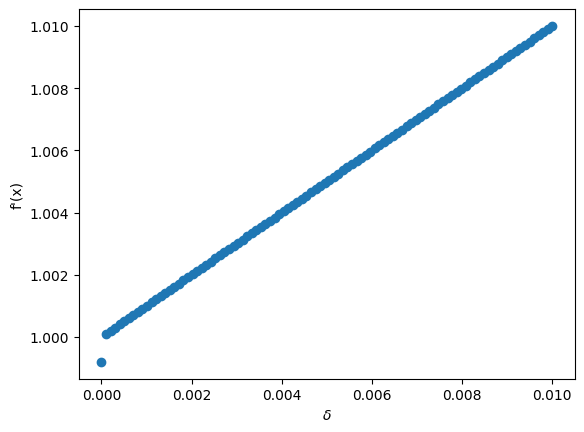

In [118]:
from matplotlib import pyplot as plt
def f(x):
    return x*(x-1)

def manual_derivative(f,x,delta):
    return (f(x+delta)-f(x))/delta

def d_f(x):
    return 2*x - 1

print("manual derivative x=1 delta=0.01:",manual_derivative(f,1,0.01))
print("d_f(1) = ",d_f(1))

# they are not the same because you need to take the limit delta->0 to get the correct one
deltas = [a for a in np.linspace(10**(-14),0.01,100)]
manual_results = [manual_derivative(f,1,d) for d in deltas]

plt.scatter(deltas,manual_results)
plt.xlabel("$\delta$")
plt.ylabel("f'(x)")
plt.show()



7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


real value: 1.5707963267948966
manual integral: 1.5691090196009057
difference between the two, real-manual = 0.0016873071939909057

time taken = 0.00040602684020996094
n = 600 integral = 1.570682895986122 


time taken = 0.0006940364837646484
n = 700 integral = 1.5707063435074993 


time taken = 0.0005650520324707031
n = 800 integral = 1.5707226955376794 


time taken = 0.0005950927734375
n = 900 integral = 1.570734632280123 


time taken = 0.0006275177001953125
n = 1000 integral = 1.5707436595231086 


time taken = 0.0007257461547851562
n = 1100 integral = 1.5707506816132368 


time taken = 0.0007925033569335938
n = 1200 integral = 1.5707562710581202 


time taken = 0.0008051395416259766
n = 1300 integral = 1.5707608060977487 


time taken = 0.0008444786071777344
n = 1400 integral = 1.5707645456088235 


time taken = 0.000986337661743164
n = 1500 integral = 1.5707676721195176 


time taken = 0.001035928726196289
n = 1600 integral = 1.5707703176330803 


time taken = 0.0009450912475585

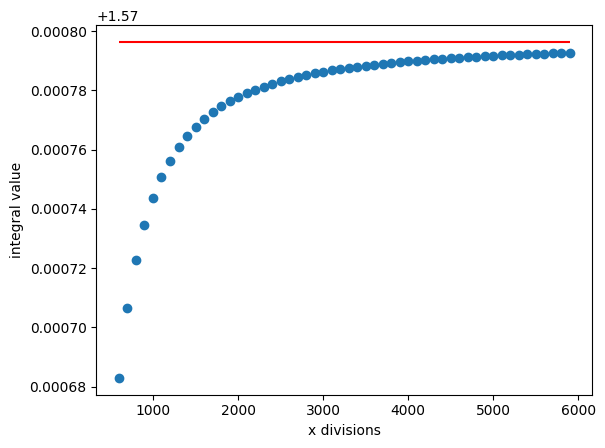

with N = 5900 and max time of 0.005 seconds, the difference bewtween in [%] between the algebric and manual integral is -0.00023368115913633124 %


In [178]:
import time

def f(x):
    return math.sqrt(1-x**2)

def integral(f,x0,x1,N):
    sum = 0
    points = np.linspace(x0,x1,N)[0:N-1]
    h = points[1]-points[0]
    for yi in points:
        sum += h*f(yi)
    return sum

print("real value:",math.pi/2)
print("manual integral:",integral(f,-1,1,100))
print("difference between the two, real-manual =", math.pi/2-integral(f,-1,1,100))

max_time = 0.005 # seconds
n = 600
N = []
integral_list = []
time_taken = 1
while True:
    tmp_time = time.time()
    int_tmp = integral(f,-1,1,n)
    time_taken = time.time() - tmp_time
    print("\ntime taken =",time_taken)
    print("n =",n,"integral =",int_tmp,"\n")
    if time_taken < max_time:
        N.append(n)
        integral_list.append(int_tmp)
        n = n + 100
    else:
        break

print(len(N))
print(len(integral_list))
plt.scatter(N,integral_list)
plt.xlabel("x divisions")
plt.ylabel("integral value")
plt.hlines(math.pi/2,min(N),max(N),colors= 'red')
plt.show()
print("with N =", max(N), "and max time of", max_time,"seconds, the difference bewtween in [%] between the algebric and manual integral is", (integral_list[len(integral_list)-1] - math.pi/2) * 200 / math.pi,"%")